In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-house-data/kc_house_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/kc-house-data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Preprocessing : 
- **Data Cleaning :** Looking for missing values and cleaning them if found
- **Data Tranformation :** Transforming all the categorical object type values to numerical values.

In [3]:
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df["sqft_above"].fillna(df["sqft_above"].mean(),inplace=True)
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- The only object feature here is `date` which will be dropped because we're not dealing with timeseries
- After that all of our features are numerical so we can move forward

In [5]:
df.info()
df.drop(columns=["id","date"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data visualization 

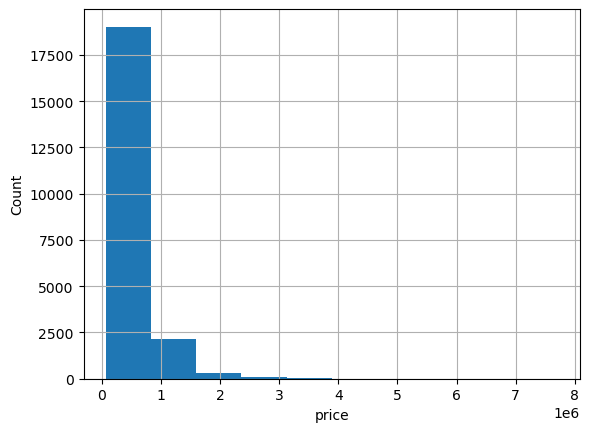

In [6]:
df["price"].hist()
plt.xlabel("price")
plt.ylabel("Count");

<AxesSubplot:>

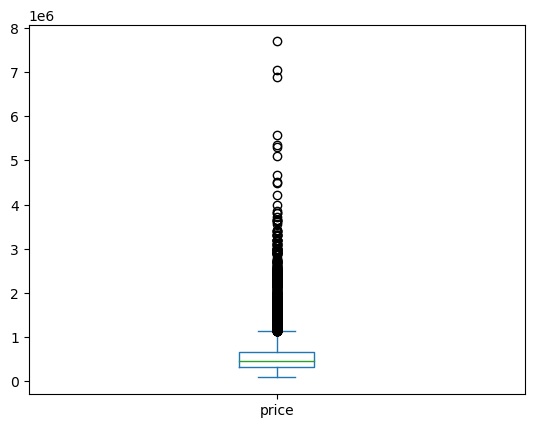

In [7]:
df["price"].plot(kind="box")

# Feature Selection 
- to be able to select the important features we have to see which feature are correlated with our target i.e `price` 
- The correlation range that will be taken in consideration is from **moderate** ( about $0.3$ or $-0.3$ ) to **very strong** ($0.9$ or $-0.9$)

According to our conditions and our heatmap , we will take : 
1. `bedrooms`
2. `bathrooms`
3. `sqft_living`
4. `view`
5. `grade`
6. `sqft_above`
7. `sqft_basement`
8. `sqft_living_15`

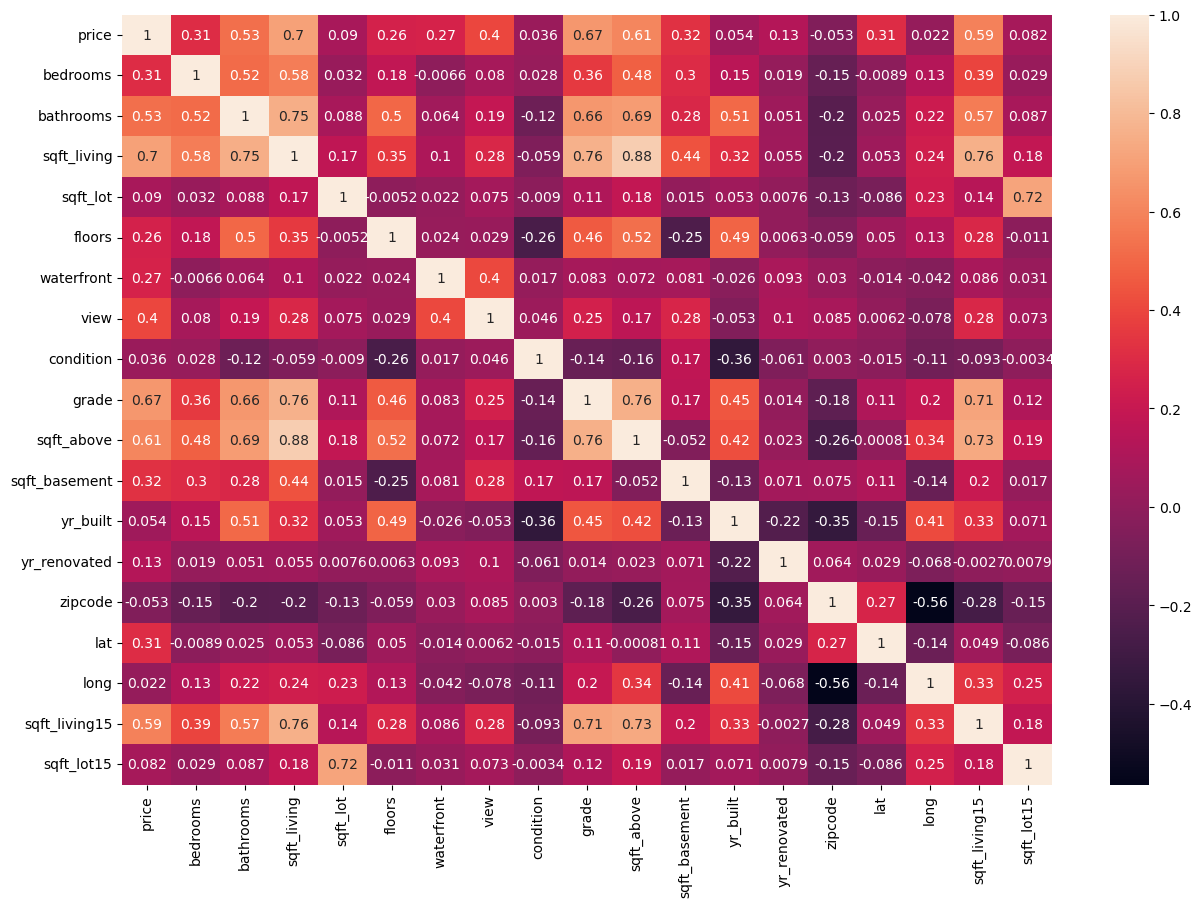

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

In [9]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605565
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

# Testing the different ways of linear regression 
- **Simple regression** : one feature in features and one target
- **Multiple-linear regression** : more than one feature and one target
- **Polynomial Linear regression** : one feature and one target + Applying polynomial features to the feature

## Simple Regression
> **StandardScaller()** dosen't show difference here that's why i didnt apply it 

In [10]:
#splitting the features and targets
y = df["price"].values
X = df[["sqft_living"]]


In [11]:
y[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [12]:
#spliting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=15)
#applying simple regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

171064.18514307198


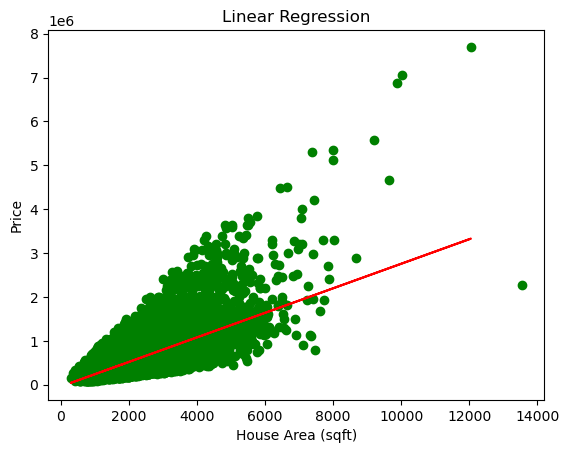

In [13]:
#simple regression plot
plt.scatter(X,y,color="g")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("House Area (sqft)") #after normalization ofc
plt.plot(X_train,lr.predict(X_train),color="r")
plt.show()

In [14]:
print ("Accuracy :" ,round(lr.score(X_test,y_test)*100,2) )

Accuracy : 49.8


## Multiple-linear regression 

In [15]:
features = ["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement","sqft_living15"]
X = df[features]

In [16]:
#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=15)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("mae : ",mae)

mae :  152603.0278542485


In [18]:
print ("Accuracy :" ,round(lr.score(X_test,y_test)*100,2) )

Accuracy : 58.81


# Polynomial Linear regression 
- Because it's not multi-polynomial we will just use one feature as input (X)

In [19]:
y = df["price"].values
X = df[["sqft_living"]]

In [20]:
#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree=2)
X_train_= pf.fit_transform(X_train)
X_test_ = pf.fit_transform(X_test)
lr.fit(X_train_,y_train)
y_pred_pf = lr.predict(X_test_)
mae = mean_absolute_error(y_test,y_pred_pf)
mae

143101.5259587019

In [22]:
print ("Accuracy :" ,round(lr.score(X_test_,y_test)*100,2) )

Accuracy : 62.52


# Conclusion : 
- Overall we saw that **multiple-linear regression (MLR)** scored $57\%$ and did better than **simple regression** $49\%$ because MLR takes more than one feature in consideration which augmented the accuracy 
- **Polynomial Linear Regression** did better than all of them with $62\%$ even that  it used only one feature but `PolynomialFeatures()` upgraded the equation from $y=ax+b$ to $y=aX^{2}+bX+c$ which made a better accuracy